In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from pathlib import Path
import pandas as pd
import seaborn as sns
from easydict import EasyDict as edict
from tqdm import tqdm_notebook as tqdm
from collections import defaultdict as ddict
from pprint import pprint

%matplotlib inline

In [2]:
def load_pkl(f):
    with open(f, "rb") as fi:
        data = pickle.load(fi)
    return data

In [15]:
def MfnSingle(dat):
    res = {}
    return res

# 1. obtain the data 

In [3]:
root = Path("./")

## 1.1 UIPD-M

In [8]:
rawUIPDM = load_pkl(root/"Boxplot_M_UIPD100.pkl")

In [17]:
UIPDM = ddict(list)
for dat in rawUIPDM:
    for key, item in dat.items():
        UIPDM[key].append(np.mean(item))

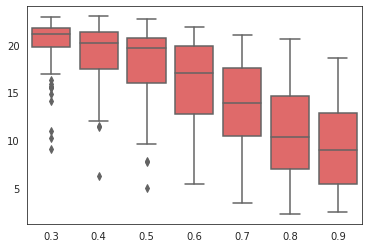

In [47]:
UIPDMdf = pd.DataFrame(UIPDM)
sns.set_style("white")
sns.boxplot(data=UIPDMdf, palette=["#F25757"])

## 1.2 UIPD-w

In [10]:
rawUIPDw = load_pkl(root/"Boxplot_w_UIPD100.pkl")

In [44]:
UIPDw = {"w":[], 
         "p0s":[],
         "Dataset": []}
UIPDm = {"m":[], 
         "p0s":[],
         "Dataset": []}
for dat in rawUIPDw:
    for key in dat[0].keys():
        ws = dat[0][key]
        Ms = dat[1][key]
        ms = ws * Ms.reshape(-1, 1)
        w = ws.mean(axis=0)
        m = ms.mean(axis=0)
        UIPDw["w"] = UIPDw["w"] + list(w)
        UIPDw["p0s"] = UIPDw["p0s"] + [float(key)] * 2
        UIPDw["Dataset"] = UIPDw["Dataset"] + [r"$D_1$ $(\theta_1=$" + "-0.3)", r"$D_2$ $(\theta_2=$" + "0.3)"]
        UIPDm["m"] = UIPDm["m"] + list(m)
        UIPDm["p0s"] = UIPDm["p0s"] + [float(key)] * 2
        UIPDm["Dataset"] = UIPDm["Dataset"] + [r"$D_1$ $(\theta_1=$" + "-0.3)", r"$D_2$ $(\theta_2=$" + "0.3)"]

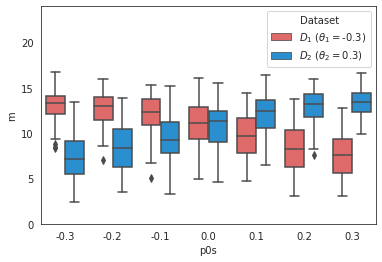

In [51]:
UIPDmdf = pd.DataFrame(UIPDm)
sns.set_style("white")
plt.ylim([0, 24])
sns.boxplot(y="m", x="p0s", hue="Dataset", data=UIPDmdf, palette=["#F25757", "#1094E9"])

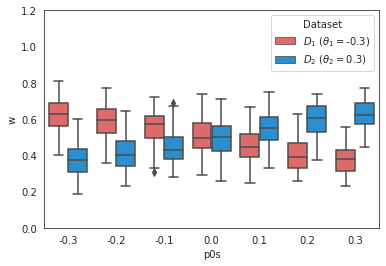

In [52]:
UIPDwdf = pd.DataFrame(UIPDw)
sns.set_style("white")
plt.ylim([0, 1.2])
sns.boxplot(y="w", x="p0s", hue="Dataset", data=UIPDwdf, palette=["#F25757", "#1094E9"])

## 1.3 UIPJS-M

In [53]:
rawUIPJSM = load_pkl(root/"Boxplot_M_UIPJS100.pkl")

In [54]:
UIPJSM = ddict(list)
for dat in rawUIPJSM:
    for key, item in dat.items():
        UIPJSM[key].append(np.mean(item))

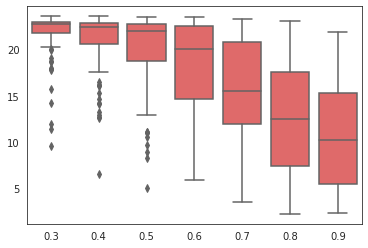

In [55]:
UIPJSMdf = pd.DataFrame(UIPJSM)
sns.set_style("white")
sns.boxplot(data=UIPJSMdf, palette=["#F25757"])

## 1.2 UIPJS-w

In [56]:
rawUIPJSw = load_pkl(root/"Boxplot_w_UIPJS100.pkl")

In [68]:
UIPJSw = {"w":[], 
         "p0s":[],
         "Dataset": []}
UIPJSm = {"m":[], 
         "p0s":[],
         "Dataset": []}
for dat in rawUIPJSw:
    for key in dat[0].keys():
        ws = dat[0][key]
        Ms = dat[1][key]
        ms = ws.reshape(1, -1) * Ms.reshape(-1, 1)
        m = ms.mean(axis=0)
        UIPJSw["w"] = UIPJSw["w"] + list(ws)
        UIPJSw["p0s"] = UIPJSw["p0s"] + [float(key)] * 2
        UIPJSw["Dataset"] = UIPJSw["Dataset"] + [r"$D_1$ $(\theta_1=$" + "-0.3)", r"$D_2$ $(\theta_2=$" + "0.3)"]
        UIPJSm["m"] = UIPJSm["m"] + list(m)
        UIPJSm["p0s"] = UIPJSm["p0s"] + [float(key)] * 2
        UIPJSm["Dataset"] = UIPJSm["Dataset"] + [r"$D_1$ $(\theta_1=$" + "-0.3)", r"$D_2$ $(\theta_2=$" + "0.3)"]

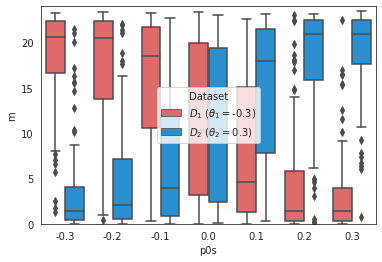

In [69]:
UIPJSmdf = pd.DataFrame(UIPJSm)
sns.set_style("white")
plt.ylim([0, 24])
sns.boxplot(y="m", x="p0s", hue="Dataset", data=UIPJSmdf, palette=["#F25757", "#1094E9"])

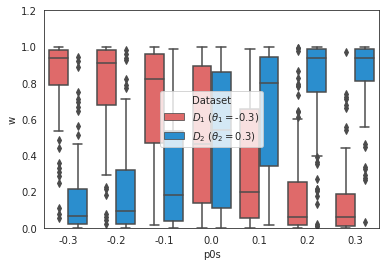

In [70]:
UIPJSwdf = pd.DataFrame(UIPJSw)
sns.set_style("white")
plt.ylim([0, 1.2])
sns.boxplot(y="w", x="p0s", hue="Dataset", data=UIPJSwdf, palette=["#F25757", "#1094E9"])

# 2. Plot the results

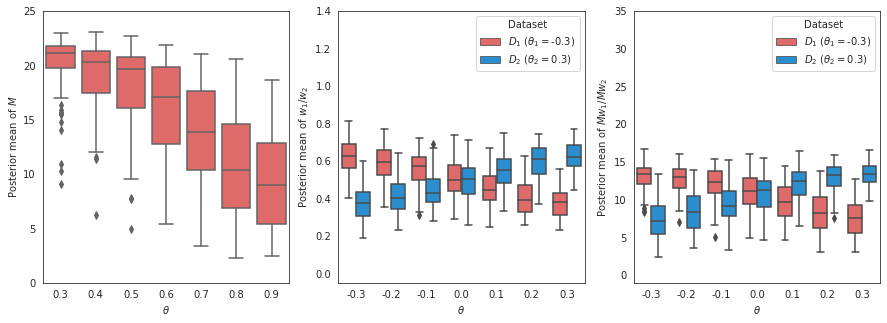

In [90]:
fig = plt.figure(figsize=[15, 5])

plt.subplot(1, 3, 1)
UIPDMdf = pd.DataFrame(UIPDM)
sns.set_style("white")
plt.ylim([0, 25])
plt.xlabel(r"$\theta$")
plt.ylabel(r"Posterior mean of $M$")
sns.boxplot(data=UIPDMdf, palette=["#F25757"])

plt.subplot(1, 3, 2)
UIPDwdf = pd.DataFrame(UIPDw)
sns.set_style("white")
plt.ylim([-0.05, 1.4])
sns.boxplot(y="w", x="p0s", hue="Dataset", data=UIPDwdf, palette=["#F25757", "#1094E9"])
plt.xlabel(r"$\theta$")
plt.ylabel(r"Posterior mean of $w_1/w_2$")

plt.subplot(1, 3, 3)
UIPDmdf = pd.DataFrame(UIPDm)
sns.set_style("white")
plt.ylim([-1, 35])
sns.boxplot(y="m", x="p0s", hue="Dataset", data=UIPDmdf, palette=["#F25757", "#1094E9"])
plt.xlabel(r"$\theta$")
_ = plt.ylabel(r"Posterior mean of $Mw_1/Mw_2$")

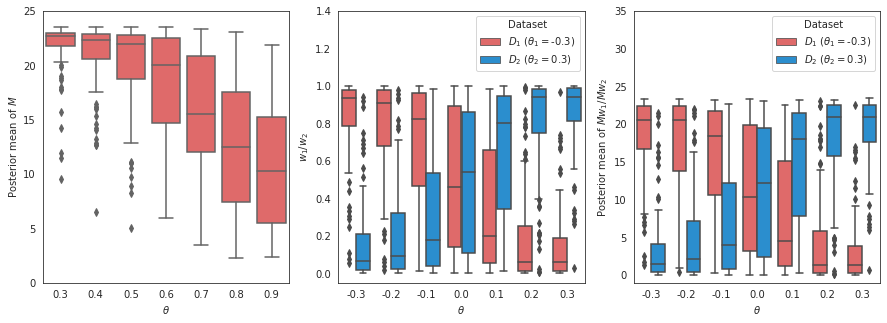

In [89]:
fig = plt.figure(figsize=[15, 5])

plt.subplot(1, 3, 1)
UIPJSMdf = pd.DataFrame(UIPJSM)
sns.set_style("white")
plt.ylim([0, 25])
plt.xlabel(r"$\theta$")
plt.ylabel(r"Posterior mean of $M$")
sns.boxplot(data=UIPJSMdf, palette=["#F25757"])

plt.subplot(1, 3, 2)
UIPJSwdf = pd.DataFrame(UIPJSw)
sns.set_style("white")
plt.ylim([-0.05, 1.4])
sns.boxplot(y="w", x="p0s", hue="Dataset", data=UIPJSwdf, palette=["#F25757", "#1094E9"])
plt.xlabel(r"$\theta$")
plt.ylabel(r"$w_1/w_2$")

plt.subplot(1, 3, 3)
UIPJSmdf = pd.DataFrame(UIPJSm)
sns.set_style("white")
plt.ylim([-1, 35])
sns.boxplot(y="m", x="p0s", hue="Dataset", data=UIPJSmdf, palette=["#F25757", "#1094E9"])
plt.xlabel(r"$\theta$")
_ = plt.ylabel(r"Posterior mean of $Mw_1/Mw_2$")